In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

## Problem Statement

## Data Gathering

In [2]:
df = pd.read_csv('diabetes2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [70]:
df.shape

(768, 9)

In [71]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [73]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

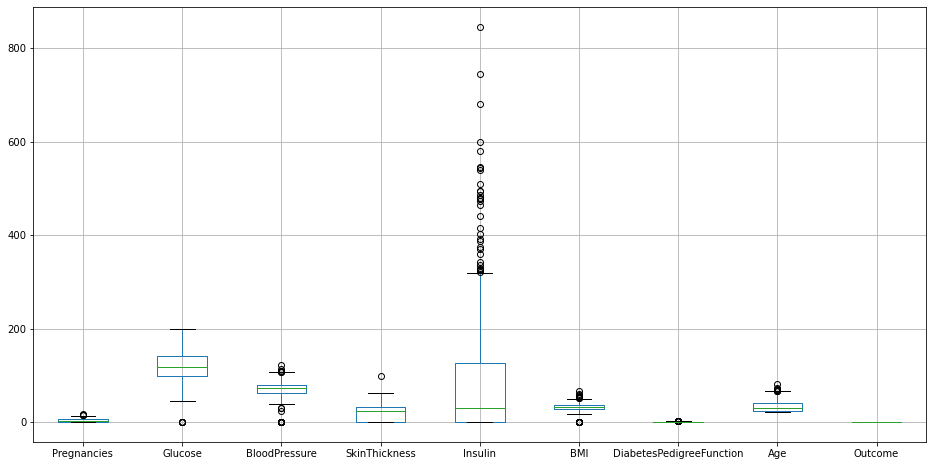

In [12]:
plt.figure(figsize=[16,8])
df.boxplot()

### 1.1 Pregnancies

In [74]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [75]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

<AxesSubplot:xlabel='Pregnancies'>

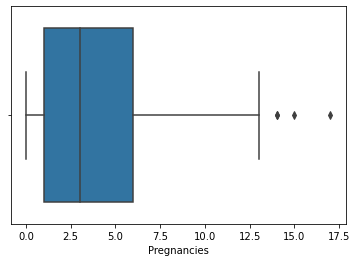

In [76]:
sns.boxplot(df['Pregnancies'])

### Outliers Handled by using log

<AxesSubplot:xlabel='Pregnancies'>

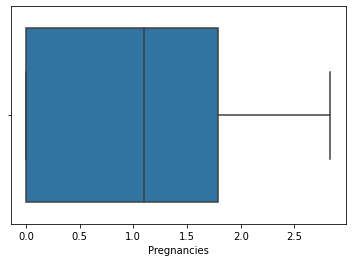

In [154]:
sns.boxplot(np.log(df['Pregnancies']))

### 1.2.Glucose

In [77]:
df['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

<AxesSubplot:xlabel='Glucose'>

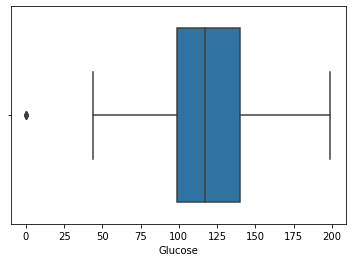

In [78]:
sns.boxplot(df['Glucose'])

### 1.3 BloodPressure

In [79]:
df['BloodPressure'].value_counts()

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64

In [80]:
df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

<AxesSubplot:xlabel='BloodPressure'>

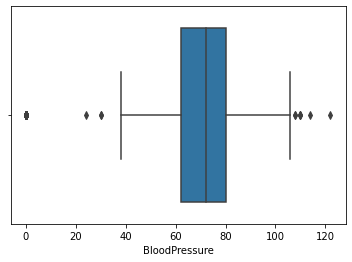

In [81]:
sns.boxplot(df['BloodPressure'])

### Outlier Handled By using IQR

In [149]:
q1 = df['BloodPressure'].quantile(0.25)
q2 = df['BloodPressure'].quantile(0.50)
q3 = df['BloodPressure'].quantile(.75)

IQR = q3 - q1

uppertail = q3 + 1.5 * IQR
lowetail  = q1 -1.5  * IQR

uppertail,lowetail

(107.0, 35.0)

In [150]:
df[df['BloodPressure'] > upper_limit]
df[df['BloodPressure'] < lower_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [152]:
df = df[df['BloodPressure'] < upper_limit]
df.shape

(768, 9)

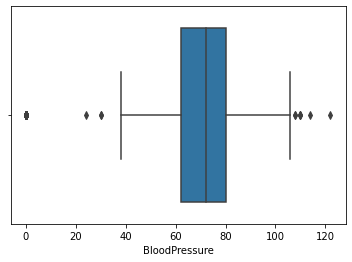

In [153]:
sns.boxplot(df['BloodPressure'])
plt.show()

In [180]:
percentile25 = df['BloodPressure'].quantile(0.25)
percentile75 = df['BloodPressure'].quantile(0.75)

upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [181]:
df[df['BloodPressure'] > upper_limit]
df[df['BloodPressure'] < lower_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [182]:
df = df[df['BloodPressure'] < upper_limit]
df.shape

(609, 9)

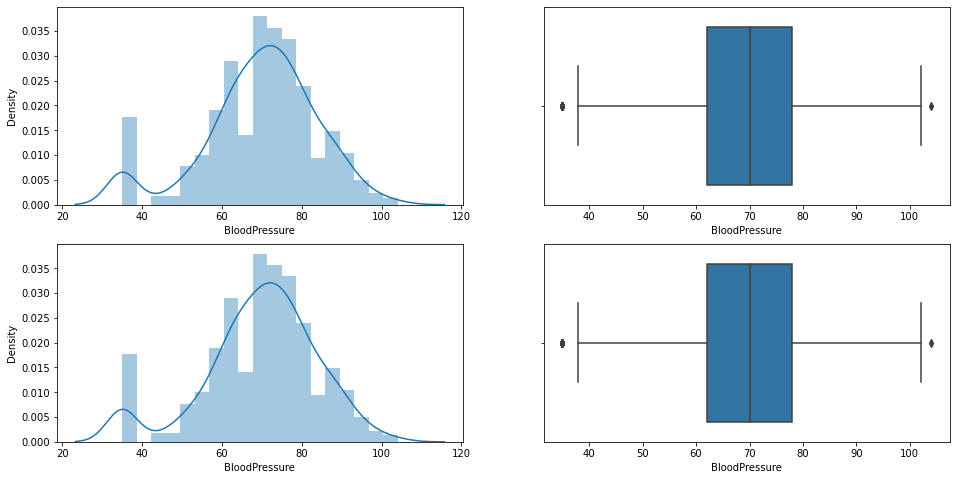

In [183]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)

sns.distplot(df['BloodPressure'])
plt.subplot(2,2,2)

sns.boxplot(df['BloodPressure'])
plt.subplot(2,2,3)

sns.distplot(df['BloodPressure'])
plt.subplot(2,2,4)

sns.boxplot(df['BloodPressure'])
plt.show()

<AxesSubplot:xlabel='BloodPressure'>

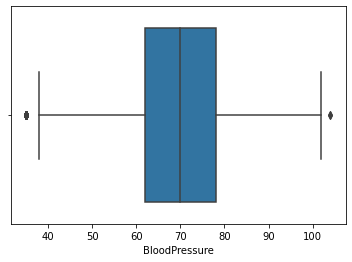

In [184]:
sns.boxplot(df['BloodPressure'])

In [186]:

df['BloodPressure'] = np.where(
    df['BloodPressure'] > upper_limit,
    upper_limit,
    np.where(
        df['BloodPressure'] < lower_limit,
        lower_limit,
        df['BloodPressure']
    )
)

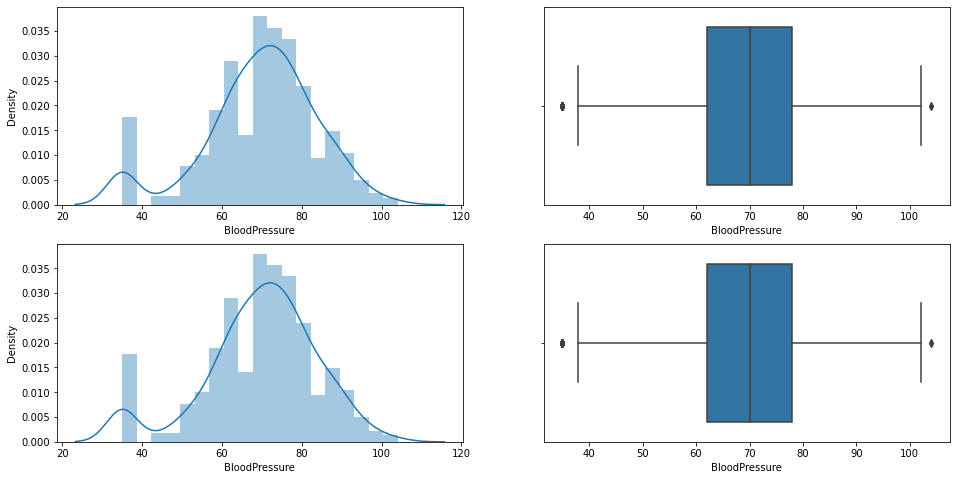

In [188]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['BloodPressure'])
plt.subplot(2,2,2)
sns.boxplot(df['BloodPressure'])
plt.subplot(2,2,3)
sns.distplot(df['BloodPressure'])
plt.subplot(2,2,4)
sns.boxplot(df['BloodPressure'])
plt.show()


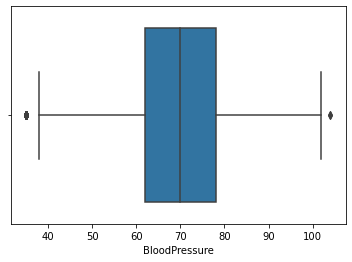

In [202]:
sns.boxplot(df['BloodPressure'])
plt.show()

### 1.4 SkinThickness

In [82]:
df['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64

In [83]:
df['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

<AxesSubplot:xlabel='SkinThickness'>

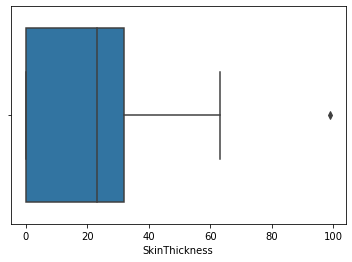

In [84]:
sns.boxplot(df['SkinThickness'])

### 1.5.Insulin

In [85]:
df['Insulin'].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [86]:
df['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

<AxesSubplot:xlabel='Insulin'>

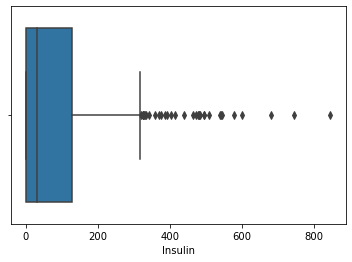

In [31]:
sns.boxplot(df['Insulin'])

### Handled Outliers

In [189]:
q1 = df['Insulin'].quantile(0.25)
q2 = df['Insulin'].quantile(0.50)
q3 = df['Insulin'].quantile(0.75)

IQR = q3 - q1


In [190]:
percentile25 = df['Insulin'].quantile(0.25)
percentile75 = df['Insulin'].quantile(0.75)

upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [191]:
df[df['Insulin'] > upper_limit]
df[df['Insulin'] < lower_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [192]:
df = df[df['Insulin'] < upper_limit]
df.shape

(609, 9)

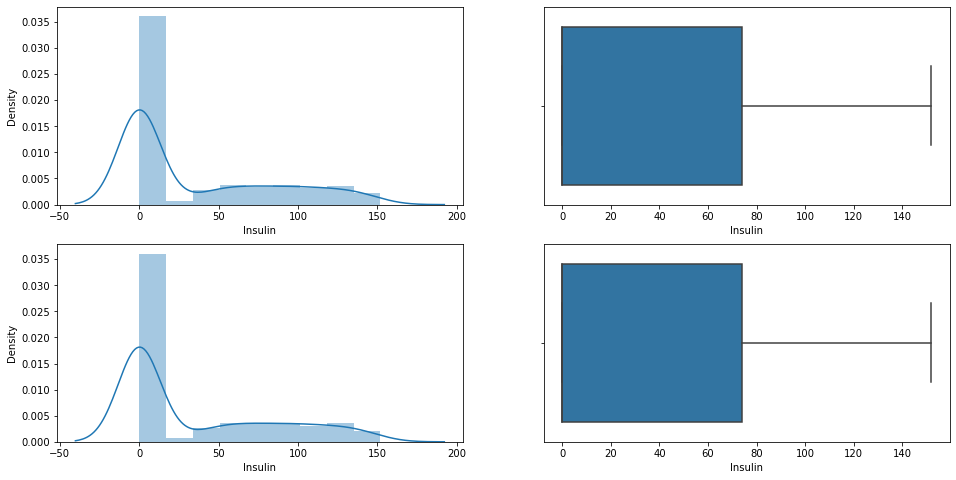

In [193]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)

sns.distplot(df['Insulin'])
plt.subplot(2,2,2)

sns.boxplot(df['Insulin'])
plt.subplot(2,2,3)

sns.distplot(df['Insulin'])
plt.subplot(2,2,4)

sns.boxplot(df['Insulin'])
plt.show()

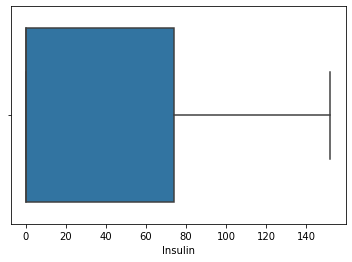

In [194]:
sns.boxplot(df['Insulin'])
plt.show()

### 1.6. BMI

In [38]:
df['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

In [39]:
df['BMI'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

<AxesSubplot:xlabel='BMI'>

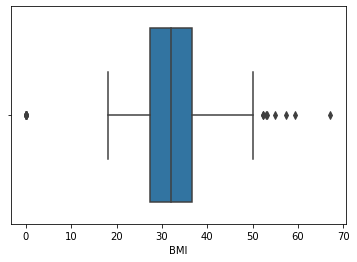

In [40]:
sns.boxplot(df['BMI'])

### IQR

In [195]:
percentile25 = df['BMI'].quantile(0.25)
percentile75 = df['BMI'].quantile(0.75)

upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [196]:
df[df['BMI'] > upper_limit]
df[df['BMI'] < lower_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [197]:
df = df[df['BMI'] < upper_limit]
df.shape

(609, 9)

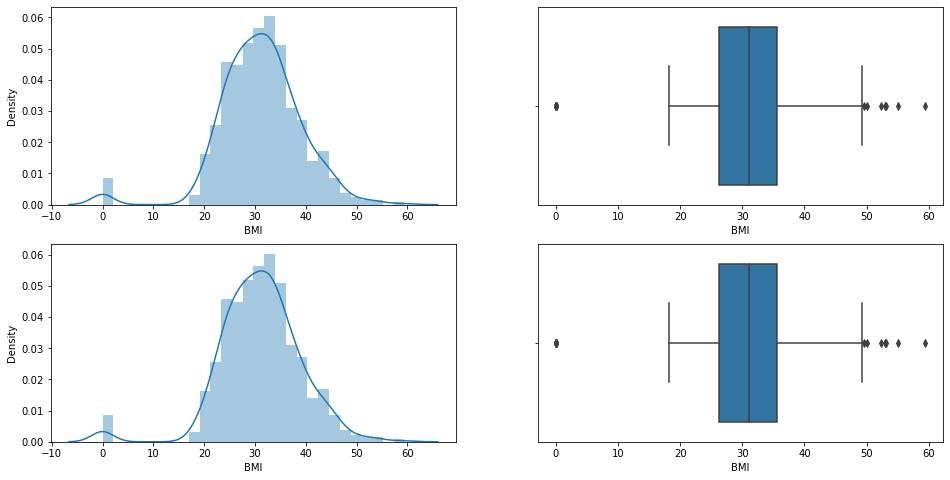

In [198]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)

sns.distplot(df['BMI'])
plt.subplot(2,2,2)

sns.boxplot(df['BMI'])
plt.subplot(2,2,3)

sns.distplot(df['BMI'])
plt.subplot(2,2,4)

sns.boxplot(df['BMI'])
plt.show()

In [199]:

df['BMI'] = np.where(df['BMI'] > upper_limit,upper_limit,
    np.where(df['BMI'] < lower_limit,lower_limit,df['BMI']
    )
)

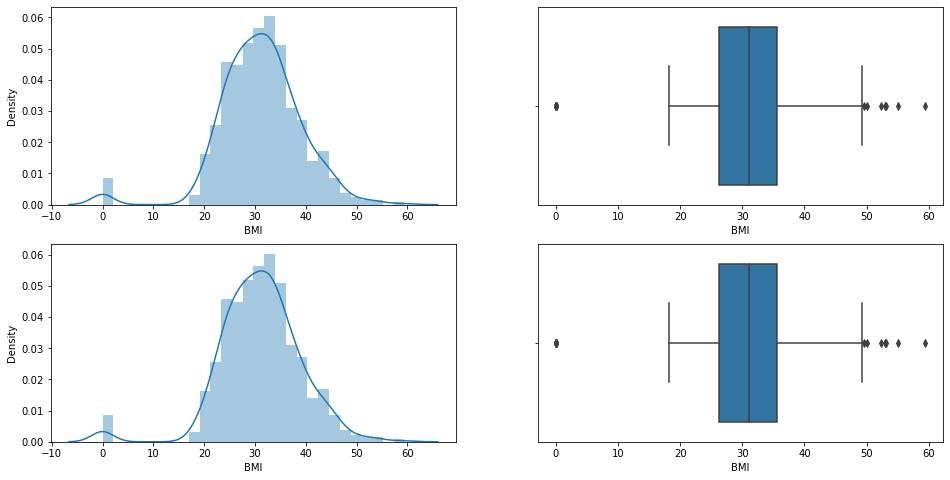

In [200]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['BMI'])
plt.subplot(2,2,2)
sns.boxplot(df['BMI'])
plt.subplot(2,2,3)
sns.distplot(df['BMI'])
plt.subplot(2,2,4)
sns.boxplot(df['BMI'])
plt.show()


<AxesSubplot:xlabel='BMI'>

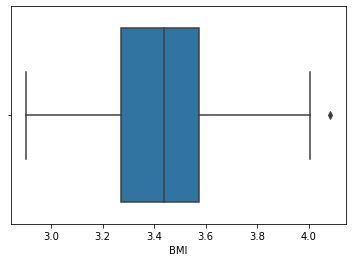

In [201]:
sns.boxplot(np.log(df['BMI']))

### 1.7.DiabetesPedigreeFunction

In [135]:
df['DiabetesPedigreeFunction'].value_counts()

Series([], Name: DiabetesPedigreeFunction, dtype: int64)

In [42]:
df['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

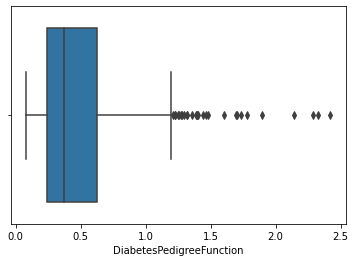

In [43]:
sns.boxplot(df['DiabetesPedigreeFunction'])

### log

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

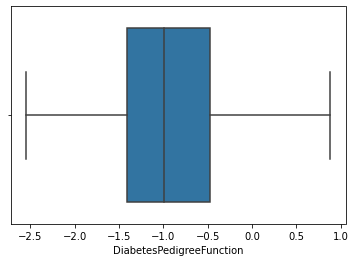

In [139]:
sns.boxplot(np.log(df['DiabetesPedigreeFunction']))

### 1.8. Age

In [44]:
df['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

In [45]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

<AxesSubplot:xlabel='Age'>

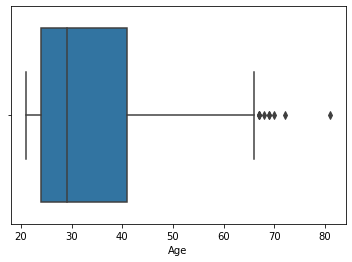

In [46]:
sns.boxplot(df['Age'])

### log

<AxesSubplot:xlabel='Age'>

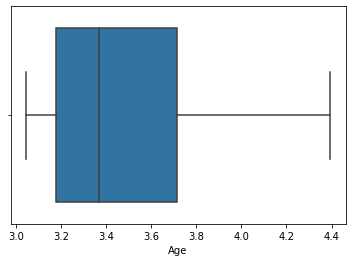

In [140]:
sns.boxplot(np.log(df['Age']))

## Train_Test_split

In [205]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [206]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=45,stratify=y)

In [207]:
y.value_counts()

0    423
1    186
Name: Outcome, dtype: int64

### Logistic Regression

In [208]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [209]:
print("Training_Accuracy :",LR.score(x_train,y_train),"Testing_Accuracy :",LR.score(x_test,y_test))

Training_Accuracy : 0.8193018480492813 Testing_Accuracy : 0.6721311475409836


### k nearest neighbor(KNN)

In [210]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [211]:
print("Training_Accuracy :",knn.score(x_train,y_train),"Testing_Accuracy :",knn.score(x_test,y_test))

Training_Accuracy : 0.8439425051334702 Testing_Accuracy : 0.6557377049180327


### HyperParameterTunning - KNN

In [212]:
# RandomizedSearch Cv
knn1  = KNeighborsClassifier()
hyper = {'n_neighbors':np.arange(1,15),
            'p':[1,2]}
rscv  = RandomizedSearchCV(knn1,hyper,cv=5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'p': [1, 2]})

In [213]:
rscv.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [215]:
knn2 = KNeighborsClassifier(n_neighbors=7)
knn2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [216]:
print("Training_Accuracy :",knn2.score(x_train,y_train),"Testing_Accuracy :",knn2.score(x_test,y_test))

Training_Accuracy : 0.839835728952772 Testing_Accuracy : 0.639344262295082


### DecisionTree

In [217]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [218]:
print("Training_Accuracy :",DT.score(x_train,y_train),"Testing_Accuracy :",DT.score(x_test,y_test))

Training_Accuracy : 1.0 Testing_Accuracy : 0.6721311475409836


### HyperParameterTunning - DT

In [219]:
DT_clf = DecisionTreeClassifier()
hyper  = {'criterion':['gini','entropy'],
          'max_depth':np.arange(3,8),
          'min_samples_split':np.arange(3,20),
          'min_samples_leaf':np.arange(3,15)}
rscv   = RandomizedSearchCV(DT_clf,hyper,cv=5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [220]:
rscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=13,
                       min_samples_split=5)

In [221]:
DT1 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=13,
                       min_samples_split=5)
DT1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=13,
                       min_samples_split=5)

In [222]:
print("Train_Accuracy:",DT1.score(x_train,y_train),"Test_Accuracy:",DT1.score(x_test,y_test))

Train_Accuracy: 0.8521560574948666 Test_Accuracy: 0.680327868852459


### Prepruning

In [223]:
dt_model_tree = DecisionTreeClassifier(random_state=45,ccp_alpha=0.0)
dt_model_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=45)

In [224]:
print("Train_Accuracy:",dt_model_tree.score(x_train,y_train),"Test_Accuracy:",dt_model_tree.score(x_test,y_test))

Train_Accuracy: 1.0 Test_Accuracy: 0.6639344262295082


### PostPruning

In [225]:
dt_tree        = dt_model_tree.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_list = dt_tree['ccp_alphas']
ccp_alpha_list

array([0.        , 0.00164271, 0.00171116, 0.00186672, 0.00190672,
       0.00190672, 0.00192505, 0.00198134, 0.00198922, 0.00199935,
       0.00234673, 0.0024392 , 0.00244451, 0.00246407, 0.00269573,
       0.00273785, 0.00273785, 0.00278387, 0.00308008, 0.00308008,
       0.00311119, 0.00316808, 0.00330498, 0.00331148, 0.00365607,
       0.00375771, 0.00383299, 0.00386728, 0.00389063, 0.00429749,
       0.00431995, 0.00432478, 0.00440012, 0.00462012, 0.00463918,
       0.00588016, 0.006096  , 0.00639653, 0.00686232, 0.00706746,
       0.01112705, 0.01569515, 0.01579087, 0.01946074, 0.09951945])

In [226]:
train_accuracy_list = []
test_accuracy_list  = []
for i in ccp_alpha_list:
    dt_model1 = DecisionTreeClassifier(random_state=45,ccp_alpha=i)
    dt_model1.fit(x_train,y_train)
    
    train_accuracy_list.append(dt_model1.score(x_train,y_train))
    test_accuracy_list.append(dt_model1.score(x_test,y_test))
    

In [227]:
np.where(test_accuracy_list ==max(test_accuracy_list))

(array([40, 44], dtype=int64),)

In [228]:
ccp_alpha_list[40],ccp_alpha_list[44]

(0.0111270498359997, 0.0995194507401801)

In [232]:
new_DT = DecisionTreeClassifier(random_state=45,ccp_alpha=0.0111270498359997)

In [233]:
new_DT.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0111270498359997, random_state=45)

In [234]:
print("Train_Accuracy:",new_DT.score(x_train,y_train),"Test_Accuracy:",new_DT.score(x_test,y_test))

Train_Accuracy: 0.8193018480492813 Test_Accuracy: 0.6967213114754098


### RandomForest

In [235]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [236]:
print("Train_Accuracy:",RF.score(x_train,y_train),"Test_Accuracy:",RF.score(x_test,y_test))

Train_Accuracy: 1.0 Test_Accuracy: 0.6557377049180327


### HyperParameterTunning - RandomForest

In [237]:
RF_tree = RandomForestClassifier()
hp      = {"n_estimators":np.arange(1,10),
            "criterion":['gini','entropy'],
            "max_depth":np.arange(2,8),
            "min_samples_split":np.arange(3,10),
            "min_samples_leaf":np.arange(2,8),
             "max_features":['sqrt','log'],
             "max_leaf_nodes":np.arange(1,3),
             
             "random_state":[39,40,41,42,43,44] }
rscv     = RandomizedSearchCV(RF_tree,hp,cv=5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7]),
                                        'max_features': ['sqrt', 'log'],
                                        'max_leaf_nodes': array([1, 2]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7]),
                                        'min_samples_split': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'random_state': [39, 40, 41, 42, 43,
                                                         44]})

In [238]:
rscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=2,
                       min_samples_leaf=6, min_samples_split=3, n_estimators=4,
                       random_state=44)

In [241]:
RF1 = RandomForestClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=2,
                       min_samples_leaf=6, min_samples_split=3, n_estimators=4,
                       random_state=44)
RF1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=2,
                       min_samples_leaf=6, min_samples_split=3, n_estimators=4,
                       random_state=44)

In [242]:
print("Train_Accuracy:",RF1.score(x_train,y_train),"Test_Accuracy:",RF1.score(x_test,y_test))

Train_Accuracy: 0.7412731006160165 Test_Accuracy: 0.6885245901639344


In [ ]:
# Logistic         >> Training_Accuracy : 0.8193018480492813 Testing_Accuracy : 0.6721311475409836
        
# knn              >> Training_Accuracy : 0.8439425051334702 Testing_Accuracy : 0.6557377049180327
# hyper            >> Training_Accuracy : 0.839835728952772  Testing_Accuracy : 0.639344262295082
        
# DT               >> Training_Accuracy : 1.0                Testing_Accuracy : 0.6721311475409836
# hyper            >> Train_Accuracy: 0.8521560574948666     Test_Accuracy: 0.680327868852459
# pre              >> Train_Accuracy: 1.0                    Test_Accuracy: 0.6639344262295082
# post model S     >> Train_Accuracy: 0.8193018480492813     Test_Accuracy: 0.6967213114754098 
        
# RF               >> Train_Accuracy: 1.0                    Test_Accuracy: 0.6557377049180327
# hyper            >> Train_Accuracy: 0.7412731006160165     Test_Accuracy: 0.6885245901639344

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df1 = df.copy()

In [9]:
m = df1['Insulin'].max()

In [10]:
df1['Insulin'] = df1['Insulin']/m

<AxesSubplot:>

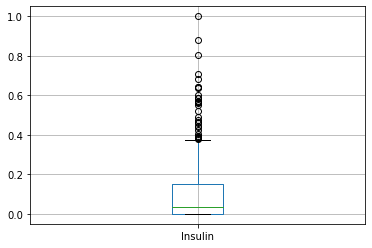

In [11]:
df1[['Insulin']].boxplot()

In [12]:
df1['Insulin'].describe()

count    768.000000
mean       0.094326
std        0.136222
min        0.000000
25%        0.000000
50%        0.036052
75%        0.150414
max        1.000000
Name: Insulin, dtype: float64

In [14]:
df1.iloc[np.where(df1['Insulin'] > 0.150414)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,0.198582,43.1,2.288,33,1
8,2,197,70,45,0.641844,30.5,0.158,53,1
13,1,189,60,23,1.000000,30.1,0.398,59,1
14,5,166,72,19,0.206856,25.8,0.587,51,1
16,0,118,84,47,0.271868,45.8,0.551,31,1
...,...,...,...,...,...,...,...,...,...
740,11,120,80,37,0.177305,42.3,0.785,48,1
744,13,153,88,37,0.165485,40.6,1.174,39,0
748,3,187,70,22,0.236407,36.4,0.408,36,1
753,0,181,88,44,0.602837,43.3,0.222,26,1


In [13]:
list1 = [10,20,30,40,50]
l1    = [i/50 for i in list1]
print(l1)

[0.2, 0.4, 0.6, 0.8, 1.0]
